In [2]:
#importing modules

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt

In [3]:
import os
import json
import pandas as pd

def load_json_files(folder_path):
    """
    Loads all JSON files from a given folder into a single pandas DataFrame.

    Parameters:
        folder_path (str): The path to the folder containing JSON files.

    Returns:
        pd.DataFrame: DataFrame containing the combined data from all JSON files.
    """
    all_data = []

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            try:
                with open(file_path, 'r', encoding='utf-8') as file:
                    data = json.load(file)

                    # Ensure the data is a list of records or a single record
                    if isinstance(data, dict):
                        all_data.append(data)
                    elif isinstance(data, list):
                        all_data.extend(data)
                    else:
                        print(f"Skipping {filename}: Unsupported JSON format")
            except Exception as e:
                print(f"Error reading {filename}: {e}")

    # Convert list of dicts to DataFrame
    return pd.DataFrame(all_data)


In [4]:
nasdaq_df = load_json_files('/home/baskar/Desktop/StockPricePred/data/NASDAQ_100')
fmp_df = load_json_files('/home/baskar/Desktop/StockPricePred/data/FMP')

In [5]:
#glimpse of the datasets
nasdaq_df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
613432,2025-01-27T00:00:00.000Z,373.75,382.4500,359.6600,366.50,3783451,373.75,382.4500,359.6600,366.50,3783451,0.0,1.0
613433,2025-01-28T00:00:00.000Z,408.68,411.2999,372.5700,372.67,8247214,408.68,411.2999,372.5700,372.67,8247214,0.0,1.0
613434,2025-01-29T00:00:00.000Z,397.07,404.3500,390.2201,404.35,4279542,397.07,404.3500,390.2201,404.35,4279542,0.0,1.0
613435,2025-01-30T00:00:00.000Z,396.87,403.0802,390.8500,399.73,2785193,396.87,403.0802,390.8500,399.73,2785193,0.0,1.0
613436,2025-01-31T00:00:00.000Z,398.07,408.1000,397.3500,398.40,3126181,398.07,408.1000,397.3500,398.40,3126181,0.0,1.0


In [6]:
fmp_df.tail()

,symbol,date,calendarYear,period,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
10888,CSX,1986-09-30,1986,Q3,0.000000,0.000000,0.000000,NaN,0.0,NaN,...,2.898666,13.749840,0.0,0.0,0.0,-0.352243,2.898666,0.010546,NaN,0.000000
10889,CSX,1986-06-30,1986,Q2,0.000000,0.000000,0.000000,NaN,0.0,NaN,...,3.081750,9.984622,0.0,0.0,0.0,0.216333,3.081750,0.008856,NaN,0.000000
10890,CSX,1986-03-31,1986,Q1,0.000000,0.000000,0.000000,NaN,0.0,NaN,...,3.316567,16.553571,0.0,0.0,0.0,-0.139634,3.316567,0.007821,NaN,0.000000
10891,CSX,1985-12-31,1985,Q4,1.050205,0.830943,0.095799,65.606061,0.0,65.606061,...,2.523333,-2.498100,0.0,0.0,0.0,0.004915,2.523333,0.009587,-1.506674,0.978581
10892,CSX,1985-09-30,1985,Q3,0.000000,0.000000,0.000000,NaN,0.0,NaN,...,2.087370,8.150230,0.0,0.0,0.0,0.000000,2.087370,0.012022,NaN,0.000000


In [7]:
#basic info on PE ratios
print(f'Basic Info : {fmp_df.info()}')
print('\n\n')
print(f'Shape : {fmp_df.shape}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10893 entries, 0 to 10892
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   symbol                              10893 non-null  object 
 1   date                                10893 non-null  object 
 2   calendarYear                        10893 non-null  object 
 3   period                              10893 non-null  object 
 4   currentRatio                        10893 non-null  float64
 5   quickRatio                          10893 non-null  float64
 6   cashRatio                           10893 non-null  float64
 7   daysOfSalesOutstanding              10278 non-null  float64
 8   daysOfInventoryOutstanding          10815 non-null  float64
 9   operatingCycle                      10278 non-null  float64
 10  daysOfPayablesOutstanding           10815 non-null  float64
 11  cashConversionCycle                 10278

In [8]:
#basic info on Prices ratios
print(f'Basic Info : {nasdaq_df.info()}')
print('\n\n')
print(f'Shape : {nasdaq_df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613437 entries, 0 to 613436
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         613437 non-null  object 
 1   close        613437 non-null  float64
 2   high         613437 non-null  float64
 3   low          613437 non-null  float64
 4   open         613437 non-null  float64
 5   volume       613437 non-null  int64  
 6   adjClose     613437 non-null  float64
 7   adjHigh      613437 non-null  float64
 8   adjLow       613437 non-null  float64
 9   adjOpen      613437 non-null  float64
 10  adjVolume    613437 non-null  int64  
 11  divCash      613437 non-null  float64
 12  splitFactor  613437 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 60.8+ MB
Basic Info : None



Shape : (613437, 13)


In [9]:
#basic statistical analysis
print(f'Statistics of ratios: \n\n {fmp_df.describe()}')

Statistics of ratios: 

        currentRatio    quickRatio     cashRatio  daysOfSalesOutstanding  \
count  10893.000000  10893.000000  10893.000000            10278.000000   
mean       2.533359      2.215011      0.810981               62.015929   
std        3.870984      3.750251      2.248099              586.343776   
min        0.000000      0.000000     -0.056006             -896.803991   
25%        1.115276      0.867109      0.164114               32.101141   
50%        1.851609      1.566191      0.443906               47.297041   
75%        3.104196      2.688517      0.925389               62.871080   
max      221.398793    211.642193    148.849007            44016.197953   

       daysOfInventoryOutstanding  operatingCycle  daysOfPayablesOutstanding  \
count                10815.000000    10278.000000               10815.000000   
mean                    49.626509      114.235300                 105.784802   
std                    996.036828     1178.474034          

In [10]:
#basic statistical analysis
print(f'Statistics of prices: \n\n {nasdaq_df.describe()}')

Statistics of prices: 

                close           high            low           open  \
count  613437.000000  613437.000000  613437.000000  613437.000000   
mean     1350.928252    1366.971984    1334.052841    1350.801673   
std      5347.011428    5402.132968    5287.437571    5346.574885   
min         0.620000       0.620000       0.593800       0.620000   
25%        51.380000      52.250000      50.500000      51.375000   
50%       161.440000     164.000000     158.999921     161.480000   
75%       739.170000     749.000000     729.000000     739.060000   
max    134657.280000  134884.800000  133764.480000  134496.000000   

             volume       adjClose        adjHigh         adjLow  \
count  6.134370e+05  613437.000000  613437.000000  613437.000000   
mean   5.297938e+06      68.141743      69.027742      67.221941   
std    2.076100e+07     187.949652     190.152543     185.678783   
min    0.000000e+00       0.006458       0.006458       0.006185   
25%    4.7874

In [11]:
#counting the missing values in the data
print(f'Ratios : \n\n {fmp_df.isnull().sum()}')
print('\n\n')
print(f'Percentage of null values (ratios) : \n\n {fmp_df.isna().mean() * 100}')

print(f'NASDAQ : \n\n {nasdaq_df.isnull().sum()}')
print('\n\n')
print(f'Percentage of null values (prices) : \n\n {nasdaq_df.isna().mean() * 100}')


Ratios : 

 symbol                                  0
date                                    0
calendarYear                            0
period                                  0
currentRatio                            0
quickRatio                              0
cashRatio                               0
daysOfSalesOutstanding                615
daysOfInventoryOutstanding             78
operatingCycle                        615
daysOfPayablesOutstanding              78
cashConversionCycle                   615
grossProfitMargin                       0
operatingProfitMargin                   0
pretaxProfitMargin                      0
netProfitMargin                         0
effectiveTaxRate                        0
returnOnAssets                          1
returnOnEquity                          1
returnOnCapitalEmployed                 1
netIncomePerEBT                         0
ebtPerEbit                              0
ebitPerRevenue                          0
debtRatio             

In [12]:
import pandas as pd
import numpy as np

def fill_missing_with_prev_or_next(df):
    # Ensure 'date' is datetime and data is sorted
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by=['symbol', 'date']).reset_index(drop=True)

    numeric_cols = df.select_dtypes(include='number').columns
    df_filled = df.copy()

    for symbol in df['symbol'].unique():
        symbol_mask = df['symbol'] == symbol
        symbol_df = df[symbol_mask].sort_values(by='date').reset_index()

        for col in numeric_cols:
            for i in range(len(symbol_df)):
                val = symbol_df.loc[i, col]
                if pd.isna(val):
                    original_idx = symbol_df.loc[i, 'index']
                    prev_val = np.nan
                    next_val = np.nan

                    # Look for previous non-null value
                    for j in range(i - 1, -1, -1):
                        prev_val = symbol_df.loc[j, col]
                        if not pd.isna(prev_val):
                            df_filled.at[original_idx, col] = prev_val
                            break
                    else:
                        # If no previous, try next
                        for k in range(i + 1, len(symbol_df)):
                            next_val = symbol_df.loc[k, col]
                            if not pd.isna(next_val):
                                df_filled.at[original_idx, col] = next_val
                                break

    return df_filled



In [13]:
# Assuming 'ratios_df' contains the JSON data loaded into a DataFrame
ratios_df_v2 = fill_missing_with_prev_or_next(fmp_df)

In [14]:
ratios_df_v2.isnull().sum()

symbol                                0
date                                  0
calendarYear                          0
period                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
daysOfInventoryOutstanding            0
operatingCycle                        0
daysOfPayablesOutstanding             0
cashConversionCycle                   0
grossProfitMargin                     0
operatingProfitMargin                 0
pretaxProfitMargin                    0
netProfitMargin                       0
effectiveTaxRate                      0
returnOnAssets                        0
returnOnEquity                        0
returnOnCapitalEmployed               0
netIncomePerEBT                       0
ebtPerEbit                            0
ebitPerRevenue                        0
debtRatio                             0
debtEquityRatio                       0


In [15]:
def compare_filled_values(original_df, filled_df):
    # Ensure dataframes are aligned
    assert original_df.shape == filled_df.shape
    numeric_cols = original_df.select_dtypes(include='number').columns
    comparisons = {}

    for col in numeric_cols:
        # Find rows where original was NaN and now has a filled value
        mask = original_df[col].isna() & filled_df[col].notna()

        if mask.sum() > 0:
            changed_rows = filled_df[mask][['symbol', 'date', col]].copy()
            changed_rows['filled_value'] = filled_df.loc[mask, col]
            changed_rows['original_value'] = original_df.loc[mask, col]
            comparisons[col] = changed_rows.head(5)

    return comparisons


In [16]:
original_df = fmp_df.copy()
#Fill nulls
filled_df = fill_missing_with_prev_or_next(fmp_df)
#Compare changes
changes = compare_filled_values(original_df, filled_df)
#print changes
for col, examples in changes.items():
    print(f"\nField: {col}")
    print(examples[['symbol', 'date', 'original_value', 'filled_value']])



Field: daysOfSalesOutstanding
    symbol       date  original_value  filled_value
134   AAPL 2019-03-30             NaN     40.765664
135   AAPL 2019-06-29             NaN     44.279953
136   AAPL 2019-09-28             NaN     64.371643
138   AAPL 2020-03-28             NaN     47.346732
139   AAPL 2020-06-27             NaN     48.366424

Field: daysOfInventoryOutstanding
    symbol       date  original_value  filled_value
816    AEP 1986-03-31             NaN      0.000000
818    AEP 1986-09-30             NaN      0.000000
901    AEP 2007-06-30             NaN     80.603969
902    AEP 2007-09-30             NaN     59.361702
903    AEP 2007-12-31             NaN     71.394586

Field: operatingCycle
    symbol       date  original_value  filled_value
134   AAPL 2019-03-30             NaN     52.910218
135   AAPL 2019-06-29             NaN     53.271377
136   AAPL 2019-09-28             NaN     73.673629
138   AAPL 2020-03-28             NaN     55.694950
139   AAPL 2020-06-27      

In [17]:
import pandas as pd

# Ensure date is in datetime format and sorted
fmp_df['date'] = pd.to_datetime(fmp_df['date'])
fmp_df = fmp_df.sort_values(by=['symbol', 'date'])

# Forward fill missing values within each symbol group
fmp_df_filled = fmp_df.groupby('symbol').ffill()

# Optional: if you want to keep non-numeric columns like 'symbol', merge them back
fmp_df_filled[['symbol']] = fmp_df[['symbol']]

# Done!


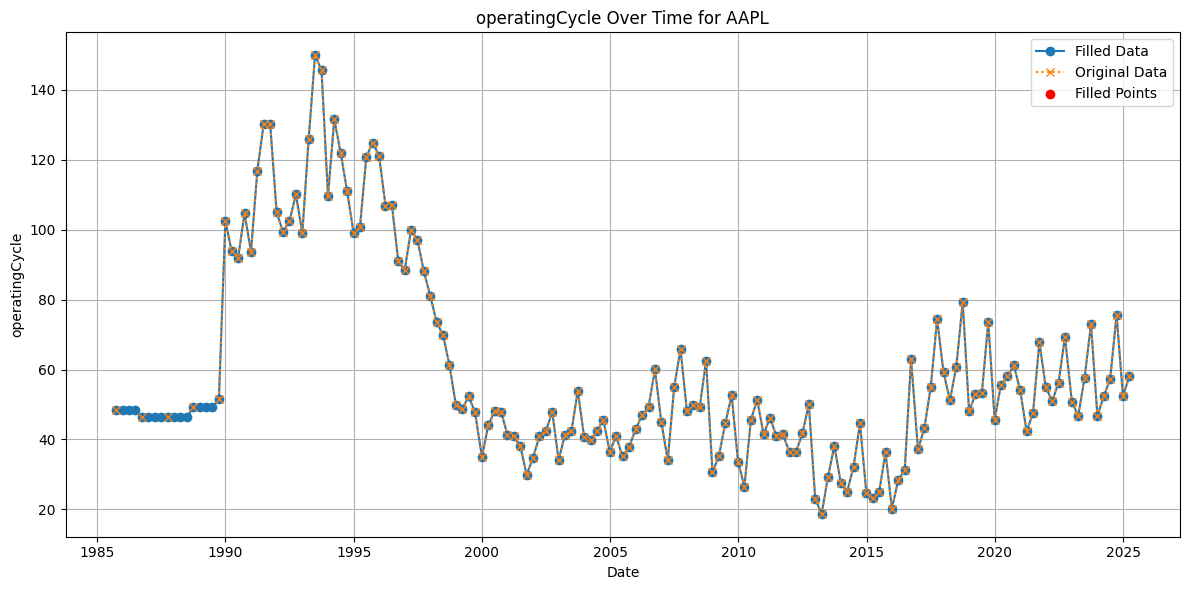

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume fmp_df is already loaded and 'ratios_df' is the filled version
original_df = fmp_df.copy()
filled_df = ratios_df_v2.copy()

# Filter for a specific stock, e.g., ABNB
symbol = "AAPL"
metric = "operatingCycle"

orig_abnb = original_df[original_df['symbol'] == symbol].copy()
filled_abnb = filled_df[filled_df['symbol'] == symbol].copy()

# Convert date if not already
orig_abnb['date'] = pd.to_datetime(orig_abnb['date'])
filled_abnb['date'] = pd.to_datetime(filled_abnb['date'])

# Ensure sorted
orig_abnb.sort_values(by='date', inplace=True)
filled_abnb.sort_values(by='date', inplace=True)

# Identify filled points
replaced_mask = orig_abnb[metric].isna() & filled_abnb[metric].notna()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(orig_abnb['date'], filled_abnb[metric], label='Filled Data', marker='o')
plt.plot(orig_abnb['date'], orig_abnb[metric], label='Original Data', linestyle='dotted', marker='x')
plt.scatter(orig_abnb.loc[replaced_mask, 'date'],
            filled_abnb.loc[replaced_mask, metric],
            color='red', label='Filled Points', zorder=5)

plt.title(f"{metric} Over Time for {symbol}")
plt.xlabel("Date")
plt.ylabel(metric)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
def extract_ratio_sequence(df, symbol, start, end):
    """
    Extracts ratio values between start and end quarter indices for a given stock symbol.

    Args:
        df (pd.DataFrame): The ratios dataframe. Must contain 'symbol', 'date' and numeric ratio columns.
        symbol (str): The stock symbol to extract for.
        start (int): The starting index (0-based, most recent quarter = -1).
        end (int): The ending index (inclusive, must be >= start).

    Returns:
        dict: {
            t_start: [r1, r2, ...],
            t_start+1: [...],
            ...
            t_end: [...]
        }
    """
    import pandas as pd

    # Input validation
    if start > end:
        raise ValueError("Start index must be <= end index")
    
    if symbol not in df['symbol'].unique():
        raise ValueError(f"Symbol '{symbol}' not found in dataframe.")

    # Filter and sort
    symbol_df = df[df['symbol'] == symbol].sort_values(by='date').reset_index(drop=True)

    # Get numeric ratio columns
    ratio_cols = df.select_dtypes(include='number').columns.tolist()
    ratio_cols = [col for col in ratio_cols if col not in ['index']]  # exclude index if present

    output = {}

    for t in range(start, end + 1):
        try:
            row = symbol_df.iloc[t]
            ratios = [row[col] for col in ratio_cols]
            output[t] = ratios
        except IndexError:
            output[t] = f"Index {t} out of range"

    return output

In [20]:
# Example: Extract quarters 0 to 4 for AAPL
result = extract_ratio_sequence(ratios_df_v2, 'AAPL', 0, 4)
print(result)

{0: [np.float64(2.7830060934326335), np.float64(2.217670954637779), np.float64(1.140825998645904), np.float64(48.37197949719307), np.float64(0.0), np.float64(48.37197949719307), np.float64(0.0), np.float64(48.37197949719307), np.float64(1.0), np.float64(-3.3226751281425435), np.float64(-6.645350256285087), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(-2.1243757802746566), np.float64(0.0), np.float64(2.0), np.float64(-3.3226751281425435), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.7006357856494096), np.float64(1.8605812897366032), np.float64(0.0), np.float64(0.0), np.float64(4.532079646017699), np.float64(0.43762016663106174), np.float64(0.01793269230769231), np.float64(0.013612637362637363), np.float64(0.024324402355930246), np.float64(0.0), np.float64(0.17483594482389178), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.floa

In [21]:
def build_symbol_ratio_dataframe(df, start, end):
    """
    Builds a multi-symbol DataFrame where each row corresponds to a quarter's ratios
    for a given symbol between 'start' and 'end' index.

    Args:
        df (pd.DataFrame): Original ratios dataframe with multiple symbols and dates.
        start (int): Start quarter index.
        end (int): End quarter index.

    Returns:
        pd.DataFrame: DataFrame with columns ['symbol', 't_index', <ratios...>]
    """
    import pandas as pd

    ratio_cols = df.select_dtypes(include='number').columns.tolist()
    ratio_cols = [col for col in ratio_cols if col not in ['index']]

    all_rows = []

    for symbol in df['symbol'].unique():
        symbol_df = df[df['symbol'] == symbol].sort_values(by='date').reset_index(drop=True)

        for t in range(start, end + 1):
            try:
                row = symbol_df.iloc[t]
                row_data = {
                    'symbol': symbol,
                    't_index': t,
                }
                row_data.update({col: row[col] for col in ratio_cols})
                all_rows.append(row_data)
            except IndexError:
                # Skip or fill with NaNs if you prefer
                continue

    result_df = pd.DataFrame(all_rows)
    return result_df


In [22]:
# Assuming your cleaned dataframe is called ratios_df_v2
output_df = build_symbol_ratio_dataframe(ratios_df_v2, start=0, end=4)
output_df.tail()


,symbol,t_index,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
500,ZS,0,0.000000,0.000000,0.000000,93.513089,0.0,93.513089,22.865920,70.647169,...,41.526252,-25.836232,0.000000,0.000000,0.000000,0.000000,41.526252,0.0,-215.949808,0.000000
501,ZS,1,1.631051,1.631051,1.191856,93.513089,0.0,93.513089,22.865920,70.647169,...,38.829771,-27.050688,-147.158525,-170.392640,-170.392640,4.328110,38.829771,0.0,-215.949808,13.727614
502,ZS,2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,35.157949,-23.601368,-192.713915,-482.377145,-482.377145,-1.416082,35.157949,0.0,-301.498743,14.123932
503,ZS,3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,31.997892,-25.074616,-452.475718,-1564.122872,-1564.122872,4.388058,31.997892,0.0,-301.498743,0.000000
504,ZS,4,1.402389,1.402389,0.985638,66.164907,0.0,66.164907,23.538659,42.626248,...,103.739170,-113.054020,-1920.077485,14072.666667,14072.666667,1.451666,103.739170,0.0,-572.067468,57.539003


In [23]:
def label_ratios_with_price_change_single_symbol(ratios_df, nasdaq_df, start, end):
    import numpy as np
    import pandas as pd
    
    # Convert 'date' columns to datetime and remove timezone info to avoid comparison errors
    ratios_df['date'] = pd.to_datetime(ratios_df['date']).dt.tz_localize(None)
    nasdaq_df['date'] = pd.to_datetime(nasdaq_df['date']).dt.tz_localize(None)
    
    output = {}
    
    # Assuming ratios_df has only one symbol now (or you want to handle single symbol)
    # Sort dataframes by date ascending
    ratios_df = ratios_df.sort_values(by='date').reset_index(drop=True)
    nasdaq_df = nasdaq_df.sort_values(by='date').reset_index(drop=True)

    total_periods = len(ratios_df)
    if start < 0 or end >= total_periods or start > end:
        raise ValueError(f"start ({start}) and end ({end}) are out of range for data length {total_periods}")

    for i in range(start, end + 1):
        row = ratios_df.iloc[i]
        date = row['date']

        # Get the price at or just after this date in nasdaq_df
        current_price_row = nasdaq_df[nasdaq_df['date'] >= date].head(1)
        if current_price_row.empty:
            continue  # no price data for this quarter date

        current_price = current_price_row['adjClose'].values[0]

        # Get the price one month after the quarter date (approx 30 days)
        future_date = date + pd.Timedelta(days=30)
        future_price_row = nasdaq_df[nasdaq_df['date'] >= future_date].head(1)
        if future_price_row.empty:
            continue  # no future price data available

        future_price = future_price_row['adjClose'].values[0]

        # Calculate price change percentage
        price_change = (future_price - current_price) / current_price * 100

        label = 'BUY' if price_change > 5 else 'SELL'

        # Collect the ratios as list, exclude non-numeric and date columns
        ratio_values = row.drop(labels=['symbol', 'date'], errors='ignore').to_list()

        output[i] = [ratio_values, label]

    return output


In [24]:
labeled_data = label_ratios_with_price_change_single_symbol(ratios_df_v2, nasdaq_df, start=0, end=4)
print(labeled_data)

{0: [['1986', 'Q1', np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(35.88785046728972), np.float64(0.0), np.float64(35.88785046728972), np.float64(0.0), np.float64(35.88785046728972), np.float64(1.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.03508064516129032), np.float64(0.009274193548387096), np.float64(0.07184949556110831), np.float64(0.0), np.float64(0.22279129321382843), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(9.072844120415226), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float6

In [34]:
import pandas as pd

def get_missing_quarters(ratios_df):
    """
    Identifies missing financial quarters (Q1-Q4) for each (symbol, calendarYear) pair
    in the given DataFrame.

    Parameters:
        ratios_df (pd.DataFrame): DataFrame with at least 'symbol', 'calendarYear', and 'period' columns.

    Returns:
        pd.DataFrame: DataFrame with columns ['symbol', 'calendarYear', 'missingQuarters']
    """
    # Standardize columns
    ratios_df = ratios_df.copy()
    ratios_df['calendarYear'] = ratios_df['calendarYear'].astype(str)
    ratios_df['period'] = ratios_df['period'].str.upper()

    # Define all quarters
    all_quarters = {'Q1', 'Q2', 'Q3', 'Q4'}

    # Find missing quarters
    missing_quarters_list = []

    grouped = ratios_df.groupby(['symbol', 'calendarYear'])
    for (symbol, year), group in grouped:
        present_quarters = set(group['period'].tolist())
        missing = all_quarters - present_quarters
        if missing:
            missing_quarters_list.append({
                'symbol': symbol,
                'calendarYear': year,
                'missingQuarters': sorted(list(missing))
            })

    # Convert to DataFrame
    return pd.DataFrame(missing_quarters_list)

missing_quarters_df = get_missing_quarters(ratios_df_v2)
print(missing_quarters_df)


    symbol calendarYear missingQuarters
0     AAPL         1985    [Q1, Q2, Q3]
1     AAPL         2025        [Q3, Q4]
2     ABNB         2019        [Q1, Q2]
3     ABNB         2025    [Q2, Q3, Q4]
4     ADBE         2025    [Q2, Q3, Q4]
..     ...          ...             ...
167   WDAY         2012        [Q1, Q2]
168    XEL         1985        [Q1, Q2]
169    XEL         2025    [Q2, Q3, Q4]
170     ZS         2016        [Q1, Q2]
171     ZS         2025        [Q3, Q4]

[172 rows x 3 columns]


In [38]:
import pandas as pd

# Standardize columns
ratios_df_v2['calendarYear'] = ratios_df_v2['calendarYear'].astype(str)
ratios_df_v2['period'] = ratios_df_v2['period'].str.upper()

# Quarter order and mapping to month-end
all_quarters = ['Q1', 'Q2', 'Q3', 'Q4']
quarter_months = {'Q1': '03-31', 'Q2': '06-30', 'Q3': '09-30', 'Q4': '12-31'}

# Collect rows to add
rows_to_add = []

# Group by symbol and year
grouped = ratios_df_v2.groupby(['symbol', 'calendarYear'])

for (symbol, year), group in grouped:
    present_quarters = set(group['period'].tolist())
    
    for i, quarter in enumerate(all_quarters):
        if quarter not in present_quarters:
            # Try to back-fill from previous quarter
            prev_quarters = all_quarters[:i][::-1]  # reversed slice up to current
            new_row = None
            
            for prev_q in prev_quarters:
                prev_rows = group[group['period'] == prev_q]
                if not prev_rows.empty:
                    new_row = prev_rows.iloc[0].copy()
                    break
            
            # If no previous data, try to forward-fill from next quarter
            if new_row is None:
                next_quarters = all_quarters[i+1:]
                for next_q in next_quarters:
                    next_rows = group[group['period'] == next_q]
                    if not next_rows.empty:
                        new_row = next_rows.iloc[0].copy()
                        break
            
            # If either previous or next found, update and add
            if new_row is not None:
                new_row = new_row.copy()
                new_row['period'] = quarter
                new_row['date'] = pd.to_datetime(f"{year}-{quarter_months[quarter]}")
                rows_to_add.append(new_row)

# Combine with original and sort
ratios_df_filled = pd.concat([ratios_df_v2, pd.DataFrame(rows_to_add)], ignore_index=True)
ratios_df_filled = ratios_df_filled.sort_values(by=['symbol', 'calendarYear', 'period']).reset_index(drop=True)

# Show the filled DataFrame
ratios_df_filled


,symbol,date,calendarYear,period,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
0,AAPL,1985-03-31,1985,Q1,2.783006,2.217671,1.140826,48.371979,0.0,48.371979,...,2.377668,0.000000,0.000000,0.000000,0.000000,0.000000,2.377668,0.001481,-0.468031,1.769538
1,AAPL,1985-06-30,1985,Q2,2.783006,2.217671,1.140826,48.371979,0.0,48.371979,...,2.377668,0.000000,0.000000,0.000000,0.000000,0.000000,2.377668,0.001481,-0.468031,1.769538
2,AAPL,1985-09-30,1985,Q3,2.783006,2.217671,1.140826,48.371979,0.0,48.371979,...,2.377668,0.000000,0.000000,0.000000,0.000000,0.000000,2.377668,0.001481,-0.468031,1.769538
3,AAPL,1985-09-30,1985,Q4,2.783006,2.217671,1.140826,48.371979,0.0,48.371979,...,2.377668,0.000000,0.000000,0.000000,0.000000,0.000000,2.377668,0.001481,-0.468031,1.769538
4,AAPL,1985-12-31,1986,Q1,0.000000,0.000000,0.000000,48.371979,0.0,48.371979,...,2.545548,0.000000,0.000000,0.000000,0.000000,0.000000,2.545548,0.001481,-0.468031,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11299,ZS,2024-07-31,2024,Q4,1.091147,1.091147,0.457158,111.808379,0.0,111.808379,...,45.251640,-450.804024,196.806358,131.797232,131.797232,2.553574,45.251640,0.000000,1156.988627,21.056594
11300,ZS,2024-10-31,2025,Q1,1.145151,1.145151,0.524241,60.850809,0.0,60.850809,...,43.921587,-572.167871,83.241372,83.241372,83.241372,27.771075,43.921587,0.000000,1117.762874,19.306903
11301,ZS,2025-01-31,2025,Q2,1.202154,1.202154,0.576774,71.443525,0.0,71.443525,...,48.051259,-1007.651815,217.059504,173.504375,173.504375,27.449825,48.051259,0.000000,2114.543516,19.368829
11302,ZS,2025-09-30,2025,Q3,1.202154,1.202154,0.576774,71.443525,0.0,71.443525,...,48.051259,-1007.651815,217.059504,173.504375,173.504375,27.449825,48.051259,0.000000,2114.543516,19.368829


In [37]:
get_missing_quarters(ratios_df_filled)

""
